TASK 1 : Prediction using supervised ML

Predict the percentage of a student based on number of study hours.

Submitted by : Karan Hanmant Jagadale

Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\karan\Downloads\student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

EDA: Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.drop_duplicates().head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Plotting the Data

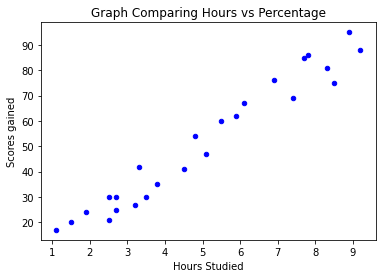

In [8]:
data.plot(kind='scatter',x='Hours',y='Scores',style='o',color='blue')
plt.title('Graph Comparing Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Scores gained')
#plt.grid()
plt.show()

#Correlation matrix
data.corr()

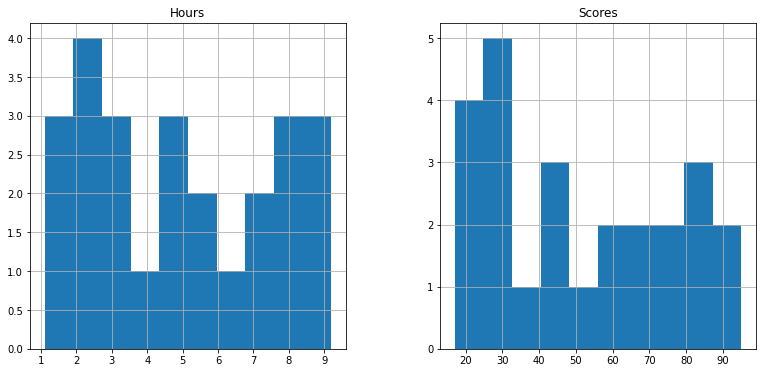

In [9]:
#Plotting the Histogram
data.hist(figsize=(13,6))
plt.show()

By observing the above visuals, we can see that there must be a LINEAR
relationship between total numbers of hours studied And scores obtained.

Now we will prepare training and testing sets.

In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [11]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [12]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

We are using the Train-Test-Split model.

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

20% data is used for testing ,80% data is used for training.

We are using the Linear Regression technique for making predictions.

In [14]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [15]:
xtrain.head()

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [16]:
ytrain.head()

22    35
17    24
24    86
23    76
14    17
Name: Scores, dtype: int64

In [17]:
xtest.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [18]:
ytest.head()

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

Training of the data is completed.

In [19]:
#Plotting the values of coefficient and intercept of regression line
print(regression.coef_)
print(regression.intercept_)

[9.91065648]
2.0181600414346974


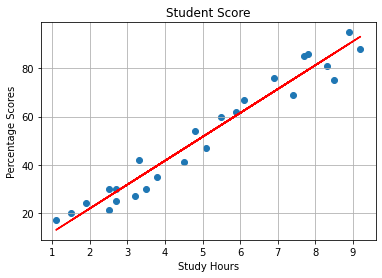

In [20]:
#Plotting the regression line

line = regression.coef_*x+regression.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='red')
plt.title('Student Score')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.grid()
plt.show()

Now,we can make the predictions.

In [21]:
ypred = regression.predict(xtest)

Comparing the predicted and actual values:

In [22]:
df=pd.DataFrame({'Actual Data':ytest,'Predicted':ypred})
df.head()

,Actual Data,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Our task is to predict the approximate value of scores obtained by a student if
He/She studies for 9.25 hours daily.

In [23]:
hours = 9.25
own_pred = regression.predict([[hours]])
print('No of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


Thus, we hsve observed that the students would obtain about 93.69 %

Model Evaluation

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error

In [25]:
print('Mean Absolute Error:',mean_absolute_error(ytest,ypred))
print('R2 Score:',r2_score(ytest,ypred))

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105355


Thus, we have succesfully predicted the percentage of a student based on the 
number of study hours.

Thank You !